In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv
import scipy.stats as stats
import math
import os
from pathlib import Path

In [80]:
PI_data = pd.read_csv("https://hivdb.stanford.edu/download/GenoPhenoDatasets/PI_DataSet.txt", sep="\t")

In [81]:
#build a DRVdataset, only keep the SeqID,DRV,CompMutList
DRVdataset = PI_data[[ 'DRV', 'CompMutList']]
print(DRVdataset)

      DRV                                        CompMutList
0     NaN                                   D30N, R57G, N88D
1     NaN                       D30N, M46I, R57G, L63P, N88D
2     NaN                       M46I, R57G, L63P, V82T, I84V
3     NaN                 L10R, M46I, R57G, L63P, V82T, I84V
4     NaN                 L10I, R57G, L63P, A71V, I84V, L90M
...   ...                                                ...
2390  9.0  L10I, I13IV, G16GE, V32I, L33F, N37S, M46L, K5...
2391  NaN                             L10I, M46I, L76V, I84V
2392  NaN  T12S, I15V, L19I, M36I, R41K, K45N, I50L, L63P...
2393  1.5  I13V, K20T, E35N, M36I, N37E, I62V, L63P, K70R...
2394  3.0  L10I, I13IV, L24F, L33F, E35D, M36I, N37ND, R4...

[2395 rows x 2 columns]


In [82]:
DRVdataset_na = DRVdataset.dropna()
print(DRVdataset_na)

       DRV                                        CompMutList
54     0.2                                               I32V
55     0.3                                               V47I
56     0.5                                               M76L
57     0.5                                               I82V
58     0.0                             I32V, V47I, M76L, I82V
...    ...                                                ...
2387  38.0  L10F, I13V, Q18QH, L19V, K20IV, E21D, L24I, V3...
2388   3.0  L10I, I13V, N37ND, R41K, M46I, I47V, L63P, A71...
2390   9.0  L10I, I13IV, G16GE, V32I, L33F, N37S, M46L, K5...
2393   1.5  I13V, K20T, E35N, M36I, N37E, I62V, L63P, K70R...
2394   3.0  L10I, I13IV, L24F, L33F, E35D, M36I, N37ND, R4...

[1115 rows x 2 columns]


In [83]:
def count_mutations(comp_mut_list):
    return len(comp_mut_list.split(','))

# Apply this function to create a new column with the count of mutations
DRVdataset_na['Mutation_Count'] = DRVdataset_na['CompMutList'].apply(count_mutations)

# Filter the DataFrame to keep only rows with more than one mutation
DRVdataset_multiple = DRVdataset_na[DRVdataset_na['Mutation_Count'] > 1]
#DRVdataset_multiple = DRVdataset_multiple.drop(columns=['Mutation_Count'])
print(DRVdataset_multiple)

       DRV                                        CompMutList  Mutation_Count
58     0.0                             I32V, V47I, M76L, I82V               4
59     0.8                       L19I, R57K, L63S, I64V, E65D               5
60     2.6  L10I, K14R, I15IV, E35D, M36I, R41K, M46L, I54...              19
62     5.7  L10C, T12K, I13V, K20T, V32I, L33V, M36I, K43I...              18
65     0.7               E35D, K43KR, R57G, L63P, V82VI, I93L               6
...    ...                                                ...             ...
2387  38.0  L10F, I13V, Q18QH, L19V, K20IV, E21D, L24I, V3...              23
2388   3.0  L10I, I13V, N37ND, R41K, M46I, I47V, L63P, A71...              12
2390   9.0  L10I, I13IV, G16GE, V32I, L33F, N37S, M46L, K5...              14
2393   1.5  I13V, K20T, E35N, M36I, N37E, I62V, L63P, K70R...              12
2394   3.0  L10I, I13IV, L24F, L33F, E35D, M36I, N37ND, R4...              20

[1107 rows x 3 columns]


C:\Users\64242\AppData\Local\Temp/ipykernel_19236/2910907618.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DRVdataset_na['Mutation_Count'] = DRVdataset_na['CompMutList'].apply(count_mutations)


maybe also need show the distribution

Frequency of Multiple Mutation Number in DRVdataset:
    Number of Mutations  Frequency
0                     2         27
1                     3         34
2                     4         65
3                     5         83
4                     6         77
5                     7         68
6                     8         53
7                     9         50
8                    10         54
9                    11         58
10                   12         55
11                   13         43
12                   14         41
13                   15         43
14                   16         69
15                   17         41
16                   18         51
17                   19         37
18                   20         45
19                   21         31
20                   22         21
21                   23         25
22                   24         11
23                   25         11
24                   26          9
25                   27          4
26

C:\Users\64242\AppData\Local\Temp/ipykernel_19236/11638816.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DRVdataset_multiple['Mutation_Number'] = DRVdataset_multiple['CompMutList'].apply(count_mutations)


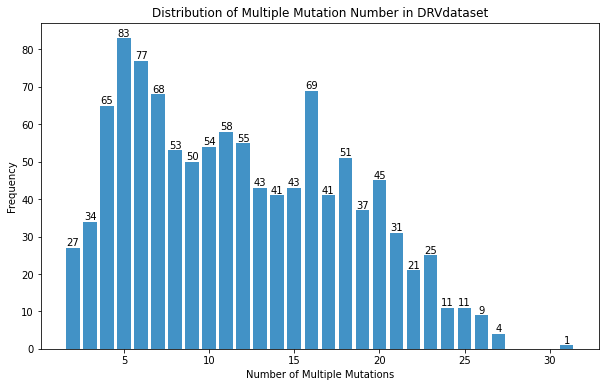

In [84]:
# Apply the function to create a new column for mutation counts
DRVdataset_multiple['Mutation_Number'] = DRVdataset_multiple['CompMutList'].apply(count_mutations)
DRVdataset_multiple_counts = DRVdataset_multiple.groupby('Mutation_Number').size()
# Create a DataFrame to store the number of mutations and their corresponding frequencies
DRVdataset_multiple_mutation_df = pd.DataFrame({
     'Number of Mutations': DRVdataset_multiple_counts.index, 
     'Frequency': DRVdataset_multiple_counts.values
 })

print("Frequency of Multiple Mutation Number in DRVdataset:")
print(DRVdataset_multiple_mutation_df)

# Plot a graph
plt.figure(figsize=(10, 6))  # Set size
bars = plt.bar(DRVdataset_multiple_counts.index, DRVdataset_multiple_counts.values, color='#4292c6')

# Add annotations
for bar in bars:
     yval = bar.get_height()
     plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.xlabel("Number of Multiple Mutations")
plt.ylabel("Frequency")
plt.title("Distribution of Multiple Mutation Number in DRVdataset")

# save
save_dir = Path("C:/Users/64242/Desktop/projectprotein/DRV_PI_DATA")
if not os.path.exists(save_dir):
     os.makedirs(save_dir)
plt.savefig(os.path.join(save_dir, 'Distribution of Multiple Mutation Number in DRVdataset.png'))
plt.show()

Initial total data 2395, 1115 after removing na, there are a total of 1107 multiple mutations in the DRVdataset_multiple dataset.
Next split the dataset and calculate the number of 2 mutations.

In [85]:
DRVdataset_2_multiple = DRVdataset_na[DRVdataset_na['Mutation_Count'] == 2]
print(DRVdataset_2_multiple)

      DRV   CompMutList  Mutation_Count
91    0.6    R57G, L63P               2
252   0.4    L19I, I93L               2
306   1.4    E35D, L63P               2
307   0.4    R57K, V77I               2
435   1.2    L63P, I72T               2
486   0.8    V77I, I93L               2
524   0.6    L63P, I64L               2
779   1.0    R57G, K70R               2
846   0.3    T12A, I64V               2
992   0.4    M36I, N37D               2
1100  0.8    L10V, R41K               2
1208  0.6  R41RK, H69HY               2
1285  1.2  L63PS, V77VI               2
1304  0.7    R57G, V77I               2
1376  0.5    L63T, V77I               2
1395  0.6   L19LI, N37S               2
1437  0.7    E35D, L63P               2
1748  0.6    I13V, I64V               2
1786  0.7    L63P, I64L               2
1848  0.5    I13V, I64V               2
1864  0.7  N37NS, R41RK               2
1904  0.9    E35D, L63P               2
2129  0.5  I15IV, I64IV               2
2146  0.5   I54IL, V77I               2


transfer the format to rosseta
This file is the mutation file input for Rosetta ddG, column1 is the wt, column 2 is chain+residue, column 3 is the residue that will be mutated; columns 4, 5 and 6 are the same but for chain B (because is a homodimer)
T A12 K T B12 K
I A13 V I B13 V
M A36 I M B36 I
V A77 I V B77 I

here are some weird data， such as R41RK, H69HY, I delete it. emmm， why we need delete mixture
two and more amino acid codes indicates a mixture

so if in the CompMutList the letter larger than 3, will be clean

In [86]:
def count_alphabets(s):
    mutations = s.split(', ')
    return all(len(mut) - len([ch for ch in mut if ch.isdigit()]) <= 2 for mut in mutations)
#calculates the number of alphabetic characters in the mutation string by subtracting the number of digit characters from the total length of the mutation string.
DRVdataset_2_multiple['ValidMutation'] = DRVdataset_2_multiple['CompMutList'].apply(count_alphabets)
DRVdataset_2_multiple_valid = DRVdataset_2_multiple[DRVdataset_2_multiple['ValidMutation']]
# Dropping the 'ValidMutation'
DRVdataset_2_multiple_valid = DRVdataset_2_multiple_valid.drop(columns=['ValidMutation'])
print(DRVdataset_2_multiple_valid)


      DRV CompMutList  Mutation_Count
91    0.6  R57G, L63P               2
252   0.4  L19I, I93L               2
306   1.4  E35D, L63P               2
307   0.4  R57K, V77I               2
435   1.2  L63P, I72T               2
486   0.8  V77I, I93L               2
524   0.6  L63P, I64L               2
779   1.0  R57G, K70R               2
846   0.3  T12A, I64V               2
992   0.4  M36I, N37D               2
1100  0.8  L10V, R41K               2
1304  0.7  R57G, V77I               2
1376  0.5  L63T, V77I               2
1437  0.7  E35D, L63P               2
1748  0.6  I13V, I64V               2
1786  0.7  L63P, I64L               2
1848  0.5  I13V, I64V               2
1904  0.9  E35D, L63P               2
2166  0.4  R57K, L63Q               2
2289  1.6  R57G, L63Q               2
2376  0.9  L63P, K70R               2


C:\Users\64242\AppData\Local\Temp/ipykernel_19236/959537225.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DRVdataset_2_multiple['ValidMutation'] = DRVdataset_2_multiple['CompMutList'].apply(count_alphabets)


transform DRVdataset_2_multiple_valid to rosseta format，keep the number and alphabets，devide to 2 chains， and add the A on left chain, B on right chain.

In [87]:
def reformat_to_rosetta(row):
    mutations = row['CompMutList'].split(', ')
    formatted_mutations = []
    
    for mutation in mutations:
        if len(mutation) >= 3:
            WT = mutation[0]#1st
            ResNum = mutation[1:-1]
            MutRes = mutation[-1]#last one
            formatted_mutations.append(f"{WT} A{ResNum} {MutRes} {WT} B{ResNum} {MutRes}")

    return ' '.join(formatted_mutations)

DRVdataset_2_multiple_valid['Rosetta_format'] = DRVdataset_2_multiple_valid.apply(reformat_to_rosetta, axis=1)
print(DRVdataset_2_multiple_valid)



      DRV CompMutList  Mutation_Count                   Rosetta_format
91    0.6  R57G, L63P               2  R A57 G R B57 G L A63 P L B63 P
252   0.4  L19I, I93L               2  L A19 I L B19 I I A93 L I B93 L
306   1.4  E35D, L63P               2  E A35 D E B35 D L A63 P L B63 P
307   0.4  R57K, V77I               2  R A57 K R B57 K V A77 I V B77 I
435   1.2  L63P, I72T               2  L A63 P L B63 P I A72 T I B72 T
486   0.8  V77I, I93L               2  V A77 I V B77 I I A93 L I B93 L
524   0.6  L63P, I64L               2  L A63 P L B63 P I A64 L I B64 L
779   1.0  R57G, K70R               2  R A57 G R B57 G K A70 R K B70 R
846   0.3  T12A, I64V               2  T A12 A T B12 A I A64 V I B64 V
992   0.4  M36I, N37D               2  M A36 I M B36 I N A37 D N B37 D
1100  0.8  L10V, R41K               2  L A10 V L B10 V R A41 K R B41 K
1304  0.7  R57G, V77I               2  R A57 G R B57 G V A77 I V B77 I
1376  0.5  L63T, V77I               2  L A63 T L B63 T V A77 I V B77 I
1437  

In [88]:
save_dir = Path("C:/Users/64242/Desktop/projectprotein/DRV_PI_DATA")
file_path = save_dir / "DRVdataset_2_multiple_RosettaData.csv"
DRVdataset_2_multiple_valid.to_csv(file_path, index=False)
print(f"Data successfully saved to {file_path}")


Data successfully saved to C:\Users\64242\Desktop\projectprotein\DRV_PI_DATA\DRVdataset_2_multiple_RosettaData.csv


well, now I finish the 2 mutations analysis process, and repeat the same process for each subdataset.

In [89]:
def count_alphabets(s):
    mutations = s.split(', ')
    return all(len(mut) - len([ch for ch in mut if ch.isdigit()]) <= 2 for mut in mutations)
#calculates the number of alphabetic characters in the mutation string by subtracting the number of digit characters from the total length of the mutation string.

def reformat_to_rosetta(row):
    mutations = row['CompMutList'].split(', ')
    formatted_mutations = []
    
    
    for mutation in mutations:
        if len(mutation) >= 3:
            WT = mutation[0]  
            ResNum = mutation[1:-1]  
            MutRes = mutation[-1] 
            formatted_mutations.append(f"{WT} A{ResNum} {MutRes}")
            formatted_mutations.append(f"{WT} B{ResNum} {MutRes}")
            
    return ' '.join(formatted_mutations)

def process_dataset(mutation_count, dataset):
    dataset_filtered = dataset[dataset['Mutation_Count'] == mutation_count]
    dataset_filtered['ValidMutation'] = dataset_filtered['CompMutList'].apply(count_alphabets)
    dataset_filtered = dataset_filtered[dataset_filtered['ValidMutation']]
    # Dropping the 'ValidMutation'
    dataset_filtered = dataset_filtered.drop(columns=['ValidMutation'])
    #devide the dataset to subdataset by the different Mutation_Count
    #using unique to prove return right value and skip empty 
    try:
        dataset_filtered['Rosetta_format'] = dataset_filtered.apply(reformat_to_rosetta, axis=1)
        # Ensure 'Rosetta_format' is created and populated correctly
        if 'Rosetta_format' not in dataset_filtered.columns or dataset_filtered['Rosetta_format'].isnull().any():
            raise ValueError("Failed to create 'Rosetta_format' column correctly.")
            
        dataset_filtered_valid = dataset_filtered[dataset_filtered['Rosetta_format'].str.len() > 0]  # Filtering valid entries
        dataset_filtered_valid.to_csv(f"C:/Users/64242/Desktop/projectprotein/DRV_PI_DATA/DRVdataset_{mutation_count}_multiple_RosettaData.csv", index=False)
        print(f"Data for mutation count {mutation_count} successfully saved.")
        
    except Exception as e:
        print(f"An error occurred: {e}")

unique_mutation_counts = DRVdataset_na['Mutation_Count'].unique()

for mutation_count in sorted(unique_mutation_counts):
    process_dataset(mutation_count, DRVdataset_na)


Data for mutation count 1 successfully saved.
Data for mutation count 2 successfully saved.
Data for mutation count 3 successfully saved.
Data for mutation count 4 successfully saved.
An error occurred: [Errno 13] Permission denied: 'C:/Users/64242/Desktop/projectprotein/DRV_PI_DATA/DRVdataset_5_multiple_RosettaData.csv'
Data for mutation count 6 successfully saved.
Data for mutation count 7 successfully saved.
Data for mutation count 8 successfully saved.
Data for mutation count 9 successfully saved.
Data for mutation count 10 successfully saved.
Data for mutation count 11 successfully saved.


C:\Users\64242\AppData\Local\Temp/ipykernel_19236/2810845250.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_filtered['ValidMutation'] = dataset_filtered['CompMutList'].apply(count_alphabets)


Data for mutation count 12 successfully saved.
Data for mutation count 13 successfully saved.
Data for mutation count 14 successfully saved.
Data for mutation count 15 successfully saved.
Data for mutation count 16 successfully saved.
Data for mutation count 17 successfully saved.
Data for mutation count 18 successfully saved.
Data for mutation count 19 successfully saved.
Data for mutation count 20 successfully saved.
Data for mutation count 21 successfully saved.
Data for mutation count 22 successfully saved.
Data for mutation count 23 successfully saved.
Data for mutation count 24 successfully saved.
Data for mutation count 25 successfully saved.
An error occurred: Wrong number of items passed 3, placement implies 1
An error occurred: Wrong number of items passed 3, placement implies 1
An error occurred: Wrong number of items passed 3, placement implies 1


In the Rosetta ddG pipeline wikipedia it says that the pipeline should also accept the "correct" mutation file, so we can try to build that one. In the mutation file documentation (here) they show how to write that file for multiple mutation, here is the example they give:
total 3 #this is the total number of mutations being made.
2 # the number of mutations made
G 1 A # the wild-type aa, the residue number, and the mutant aa
W 6 Y # the wild-type aa, the residue number, and the mutant aa
1 #the number of mutations
F 10 Y # the wild-type aa, the residue number, and the mutant aa
In this case, it seems that G to A, and W to Y are done at the same time